<a href="https://colab.research.google.com/github/CAkshay123/Projects/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (1,990 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562550 sha256=086ef405122e2b47bb0cab1b8ffd5d925fc37592773096eb9f63d0278c147ca5
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [ ]:
!which tesseract

/usr/bin/tesseract


In [ ]:
import numpy as np
import cv2
#import pytesseract
from PIL import Image,ImageOps
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


In [ ]:
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'

# Checking tesseract and ocr.space

In [ ]:


# Open an image using the Python Imaging Library (PIL)
image = Image.open('drive/MyDrive/Colab Notebooks/OCR/3.jpg')

# Perform OCR to recognize individual characters
custom_config = r'--psm 6'  # Page Segmentation Mode for single line
custom_config += r' --oem 1'  # OCR Engine Mode 1 for LSTM (best available)
custom_config += r' -l eng'
characters = pytesseract.image_to_string(image, config=custom_config, lang='eng')

print(characters)


‘t WAS not bye Cre by Me
it was not wniten by Me
it was not writen by me



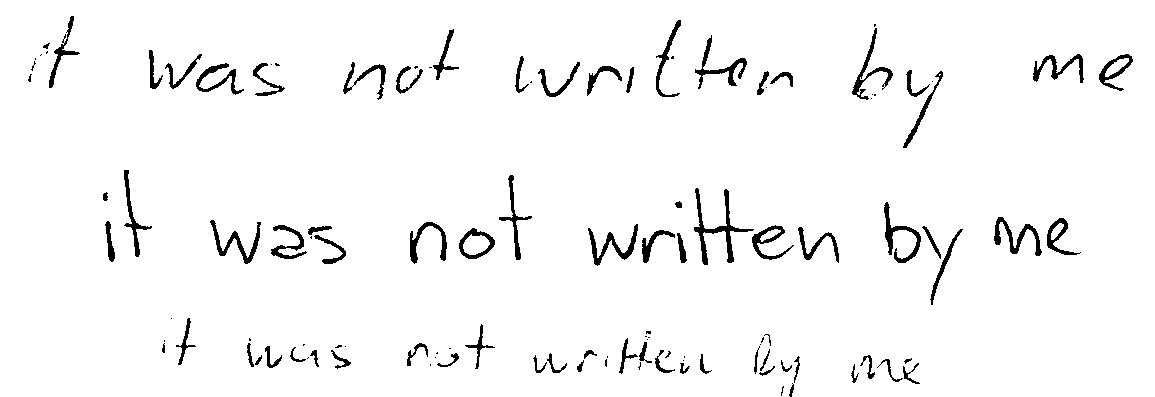

In [ ]:
image = ImageOps.grayscale(image)
threshold = 127  # Adjust this threshold as needed
image = image.point(lambda p: p > threshold and 255)
image

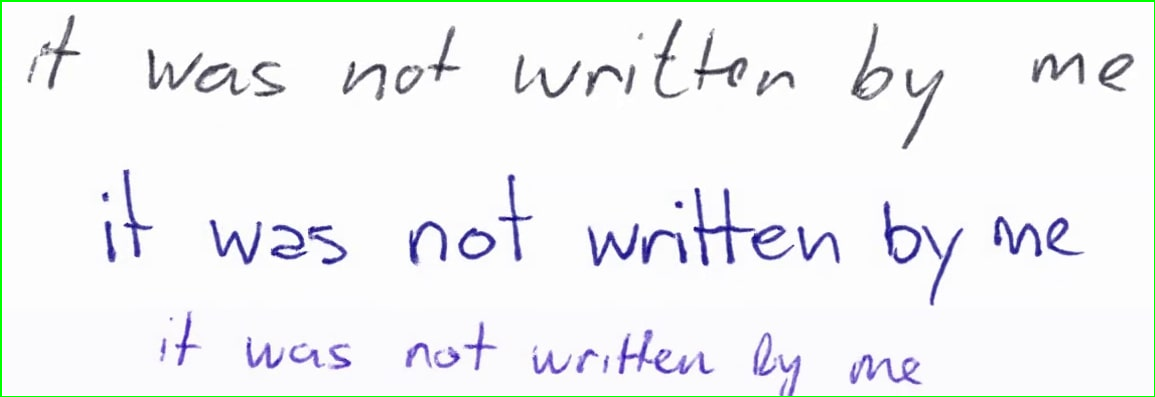

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load the handwritten text image
image = cv2.imread('drive/MyDrive/Colab Notebooks/OCR/3.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, binary = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image (each contour represents a character)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through the contours and draw bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Save or display the image with bounding boxes
cv2.imwrite('output_with_bounding_boxes.jpg', image)
cv2_imshow(image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
results = pytesseract.image_to_boxes(image)

In [ ]:
image = cv2.imread('drive/MyDrive/Colab Notebooks/OCR/3.jpg')

In [ ]:
for b in results.splitlines():
  print(b)

~ 0 395 1155 397 0
~ 0 0 2 397 0
. 638 358 643 364 0
w 1032 313 1084 344 0
e 1099 306 1134 343 0
i 40 308 80 382 0
W 148 307 203 348 0
a 195 302 247 334 0
s 252 300 285 335 0
n 343 297 386 336 0
o 349 297 423 370 0
t 395 303 460 370 0
W 515 304 534 342 0
i 537 299 581 336 0
t 586 301 635 332 0
e 655 299 686 378 0
e 694 307 748 365 0
b 851 297 893 373 0
y 902 248 944 328 0
; 675 189 683 196 0
M 994 140 1042 181 0
e 1047 141 1084 180 0
i 102 135 116 205 0
b 123 140 153 228 0
W 210 132 262 177 0
a 239 119 307 199 0
s 271 132 340 172 0
a 409 132 447 176 0
s 458 137 496 169 0
t 498 136 522 223 0
w 588 131 639 174 0
r 642 133 687 167 0
t 646 119 725 213 0
t 693 131 755 209 0
e 751 137 794 172 0
n 797 134 840 171 0
b 884 133 922 196 0
y 922 91 963 171 0
i 161 36 172 79 0
t 175 31 199 85 0
w 247 29 283 60 0
a 289 29 325 54 0
s 329 28 351 53 0
n 406 30 432 54 0
o 434 29 460 50 0
t 464 27 496 75 0
w 533 23 571 50 0
r 547 23 595 67 0
i 576 24 609 48 0
t 601 23 637 67 0
t 619 23 655 67 0
e 618 23 

In [ ]:
# Convert the image to a NumPy array
image_np = np.array(image)

# Create a copy of the image for drawing bounding boxes
image_with_boxes = np.copy(image_np)

# Get image dimensions
height, width, _ = image_with_boxes.shape

# Iterate through the bounding box data and draw rectangles
for line in results.splitlines():
    data = line.split(' ')
    char, x, y, w, h = data[0], int(data[1]), int(data[2]), int(data[3]), int(data[4])

    # Calculate the coordinates and draw a rectangle
    x1, y1, x2, y2 = x, height - y,  w, height - h
    cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Save or display the image with bounding boxes
cv2.imwrite('drive/MyDrive/Colab Notebooks/OCR/image_with_boxes.png', image_with_boxes)


True

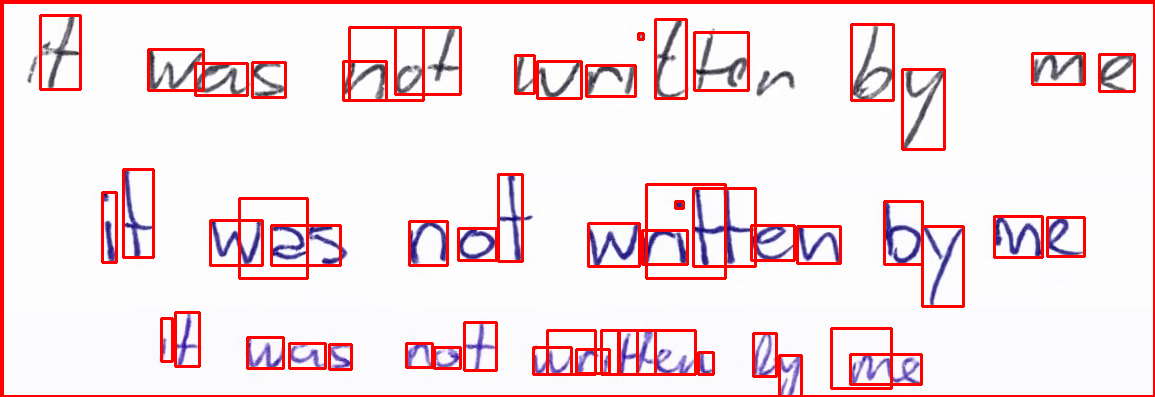

In [ ]:
image = Image.open('drive/MyDrive/Colab Notebooks/OCR/image_with_boxes.png')
image

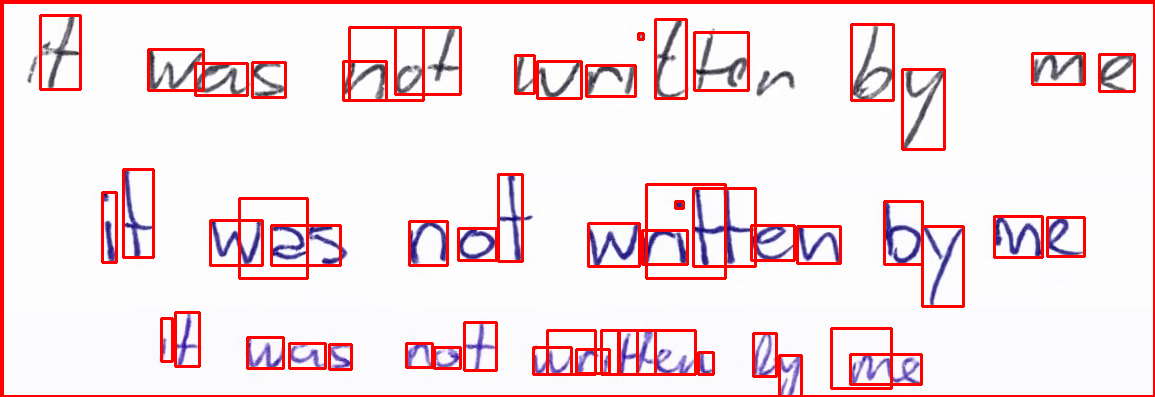

In [ ]:
image = Image.open('drive/MyDrive/Colab Notebooks/OCR/image_with_boxes.png')
image

In [ ]:
import requests
import json
from google.colab import files
uploaded = files.upload()


Saving 3.jpg to 3.jpg


In [ ]:
list(uploaded.keys())[0]

'3.jpg'

In [ ]:
api_key = 'K87049324088957'  # Replace with your actual API key
image_path = '/content/3.jpg'  # Replace with the path to your uploaded image

payload = {
    'apikey': api_key,
    'language': 'eng',  # Adjust the language code if needed
    'isOverlayRequired': True,
    'OCREngine':2# Change to True if you want overlay text extraction
}

with open(image_path, 'rb') as image_file:
    response = requests.post('https://api.ocr.space/parse/image', files={'file': image_file}, data=payload)

result = json.loads(response.content.decode())


In [ ]:
result

{'ParsedResults': [{'TextOverlay': {'Lines': [{'LineText': 'it was not written by',
      'Words': [{'WordText': 'it',
        'Left': 23.0,
        'Top': -32.0,
        'Height': 125.0,
        'Width': 83.0},
       {'WordText': 'was',
        'Left': 113.0,
        'Top': -26.0,
        'Height': 132.0,
        'Width': 202.0},
       {'WordText': 'not',
        'Left': 322.0,
        'Top': -12.0,
        'Height': 129.0,
        'Width': 158.0},
       {'WordText': 'written',
        'Left': 487.0,
        'Top': -1.0,
        'Height': 140.0,
        'Width': 322.0},
       {'WordText': 'by',
        'Left': 816.0,
        'Top': 21.0,
        'Height': 142.0,
        'Width': 326.0}],
      'MaxHeight': 195.0,
      'MinTop': -32.0},
     {'LineText': 'it was not written by me',
      'Words': [{'WordText': 'it',
        'Left': 89.0,
        'Top': 155.0,
        'Height': 114.0,
        'Width': 88.0},
       {'WordText': 'was',
        'Left': 185.0,
        'Top': 160.0,
  

In [ ]:
result['ParsedResults'][0]['TextOverlay']['Lines'][0]['Words']

[{'WordText': 'it',
  'Left': 23.0,
  'Top': -32.0,
  'Height': 125.0,
  'Width': 83.0},
 {'WordText': 'was',
  'Left': 113.0,
  'Top': -26.0,
  'Height': 132.0,
  'Width': 202.0},
 {'WordText': 'not',
  'Left': 322.0,
  'Top': -12.0,
  'Height': 129.0,
  'Width': 158.0},
 {'WordText': 'written',
  'Left': 487.0,
  'Top': -1.0,
  'Height': 140.0,
  'Width': 322.0},
 {'WordText': 'by',
  'Left': 816.0,
  'Top': 21.0,
  'Height': 142.0,
  'Width': 326.0}]

In [ ]:
image=Image.open('drive/MyDrive/Colab Notebooks/OCR/3.jpg')
draw = ImageDraw.Draw(image)
cropped_images = []
for k in range(len(result['ParsedResults'][0]['TextOverlay']['Lines'])):
  for b in result['ParsedResults'][0]['TextOverlay']['Lines'][k]['Words']:
    left = b['Left']
    top = b['Top']
    if top<0:
      top=0
    right = left +b['Width']
    bottom = top + b['Height']
    cropped_image = image.crop((left, top, right, bottom))
    cropped_images.append(cropped_image)
    draw.rectangle([left, top, right, bottom], outline='red', width=2)


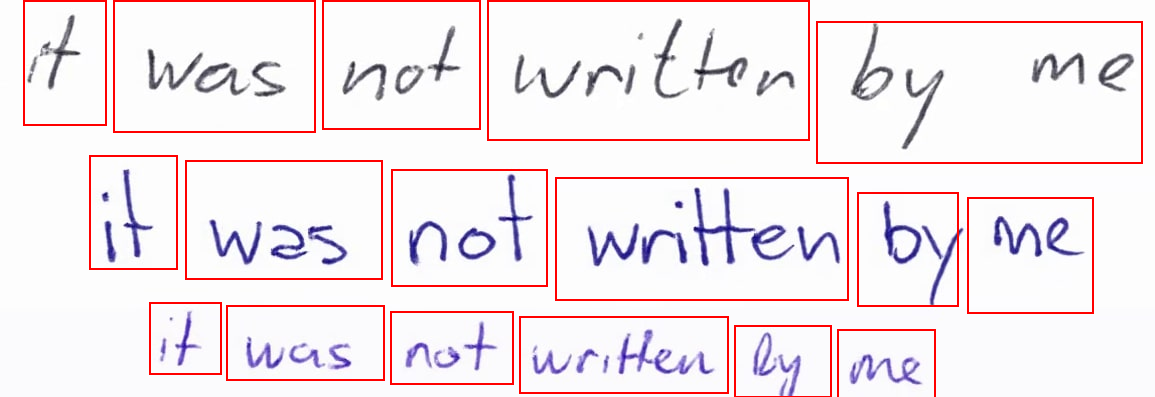

In [ ]:
display.display(image)

In [ ]:
from PIL import Image, ImageDraw
import IPython.display as display

In [ ]:
for cropped_image in enumerate(cropped_images):
    cropped_image

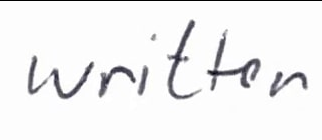

In [ ]:
i=3
cropped_images[i]

In [ ]:
characters = pytesseract.image_to_string(cropped_images[i], config=custom_config, lang='eng')

print(characters)


written



In [ ]:
results = pytesseract.image_to_boxes(cropped_images[i])
for b in results.splitlines():
  print(b)

w 28 41 94 84 0
r 56 28 136 124 0
i 99 43 156 106 0
t 168 41 199 120 0
t 176 28 240 124 0
e 207 49 260 107 0
n 270 43 304 68 0


In [ ]:
image_np = np.array(cropped_images[i])

# Create a copy of the image for drawing bounding boxes
image_with_boxes_small = np.copy(image_np)

# Get image dimensions
height, width, _ = image_with_boxes_small.shape

# Iterate through the bounding box data and draw rectangles
for line in results.splitlines():
    data = line.split(' ')
    char, x, y, w, h = data[0], int(data[1]), int(data[2]), int(data[3]), int(data[4])

    # Calculate the coordinates and draw a rectangle
    x1, y1, x2, y2 = x, height - y,  w, height - h
    cv2.rectangle(image_with_boxes_small, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Save or display the image with bounding boxes
cv2.imwrite('drive/MyDrive/Colab Notebooks/OCR/image_with_boxes_small.png', image_with_boxes_small)

True

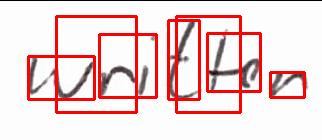

In [ ]:
image = Image.open('drive/MyDrive/Colab Notebooks/OCR/image_with_boxes_small.png')
image

# ALL ABOUT CHARACTER SEGMENTATION

In [ ]:
# for i in range(len(cropped_images)):
#   cropped_images[i].save(f"/content/drive/MyDrive/Colab Notebooks/OCR/smalls/{i}.png", format='PNG')

In [ ]:
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/OCR/smalls/3.png")

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [ ]:
threshold_value = 220  # Adjust this value as needed
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)


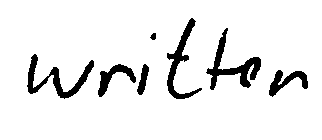

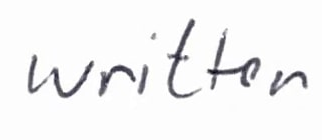

(None, None)

In [ ]:
cv2_imshow(binary_image),cv2_imshow(image)

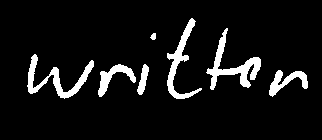

In [ ]:
inverted_image = 255 - binary_image
cv2_imshow(inverted_image)

In [ ]:
def histvertical(image,histo=False):
  """Accepts image of written character being in white color and
   background in black color: In binary form to perform vertical histogram

   Output: numpy 1d array that gives vertical histogram data with length equal to width of the image

   also plots  a histogram for reference
   if histo=True """
  image=image/255;
  column_sums = np.sum(image, axis=0)
  if histo==True:
    plt.bar(range(len(column_sums)), column_sums,width=1)
  return column_sums

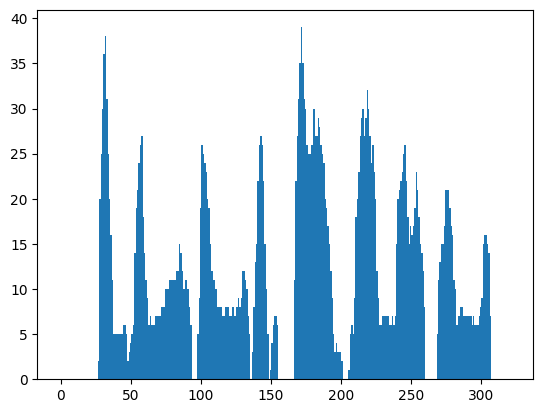

In [ ]:
hist=histvertical(inverted_image,histo=True);

In [ ]:
def characterSegment(image,hist,rgb=True,show=False):
  """Draws line and outputs the line on the image if hist value is 0 at anywhere,rgb=False if image has 1 channel
  default is 3 channels
  Return:Image with all the segment lines with hist value 0
  if show==True, Function directly show image of lined image"""
  image=image.astype(np.uint8)
  l=len(image[:][0])
  if rgb==False:
    image = cv2.applyColorMap(image, cv2.COLORMAP_WINTER)


  for i in range(len(hist)):
    if hist[i]==0:
      cv2.line(image, (i, 0), (i, l), color=(0, 0, 255), thickness=1)
  if show==True:
    cv2_imshow(image)
  return image


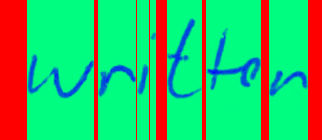

In [ ]:
characterSegment(gray_image,hist,rgb=False,show=True);

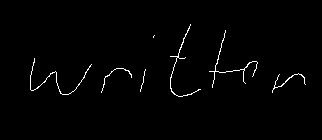

In [ ]:
thinned_image = cv2.ximgproc.thinning(255-binary_image)
cv2_imshow(thinned_image)

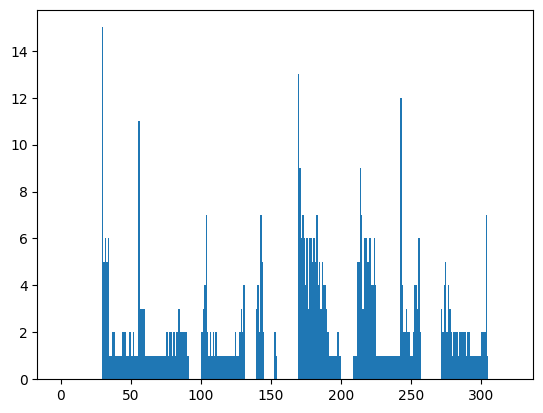

In [ ]:
  histvertical(thinned_image,histo=True);

In [ ]:
  def getleftrightimg(hist):
    """
    Takes vertical histogram projection of a word and
    outputs list the location of width of the word according to space vertical
    histogram projection
    returns pairs of x width
    """
    x=[]
    detect=0
    for i in range(len(hist)):
      if detect==0:
        if hist[i]!=0:
          detect=1
          x.append(i-1)

      elif detect==1:
        if hist[i]==0:
          detect=0
          x.append(i)
    pairs = [(x[i], x[i + 1]) for i in range(0, len(x), 2)]
    return pairs






In [ ]:
xdetect=getleftrightimg(hist)

In [ ]:
xdetect

[(26, 94),
 (97, 136),
 (136, 149),
 (149, 156),
 (166, 202),
 (205, 261),
 (268, 308)]

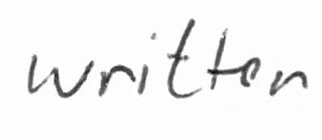

In [ ]:
cv2_imshow(gray_image)

In [ ]:
# l=len(gray_image[:][0])
# dummy=gray_image
# dummy=dummy.astype(np.uint8)
# dummy = cv2.applyColorMap(dummy, cv2.COLORMAP_HOT)
# for i in range(0,len(xdetect),1):
#   x1,x2=xdetect[i]
#   cv2.line(dummy, (x1, 0), (x2, l), color=(0, 0, 255), thickness=1)

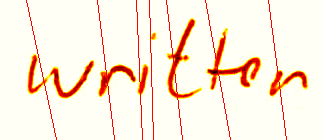

In [ ]:
# cv2_imshow(dummy)

In [ ]:
def topbotdetect(image,histo=False):
  """detect top and bottom of a binary image by taking horizontal
    if `histo=True` plots the graph too
    histogram projection
    returns :top,bottom
    """
  image=image/255;
  row_sums = np.sum(image, axis=1)
  if histo==True:
    plt.bar(range(len(row_sums)), row_sums,width=1)

  x=getleftrightimg(row_sums)
  top,_=x[0]
  _,bottom=x[len(x)-1]
  return (top,bottom)

In [ ]:
def gettopbottomimg(image,x):
  """Takes the whole binary image and
   the characters horizontal boundary acquired from vertical projection as list of (left,right) pairs
   gives out the (top,bottom) for each (left,right) pairs as a list
  """
  pairs=[]
  for (i,j) in x:
    k=topbotdetect(image[:,i:j+1])
    pairs.append(k)
  return pairs




In [ ]:
dummy=inverted_image
dummy_rgbimage=image

In [ ]:
dhist=histvertical(dummy)
xpairs=getleftrightimg(dhist)
ypairs=gettopbottomimg(dummy,xpairs)
for i in range(len(xpairs)):
  x1,x2=xpairs[i]
  y1,y2=ypairs[i]
  cv2.rectangle(dummy_rgbimage,(x1,y1),(x2,y2),color=(0,0,255))

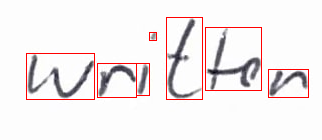

In [ ]:
cv2_imshow(dummy_rgbimage)

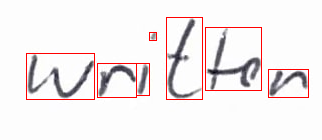

In [ ]:
cv2_imshow(image)

In [ ]:
def characterDetect(image,threshold_value=200,thinning=False):
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  _, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
  inverted_image = 255 - binary_image
  dummy=inverted_image
  if thinning==True:
    dummy=cv2.ximgproc.thinning(inverted_image)
  dummy_rgbimage=image

  dhist=histvertical(dummy)
  xpairs=getleftrightimg(dhist)
  ypairs=gettopbottomimg(dummy,xpairs)
  for i in range(len(xpairs)):
    x1,x2=xpairs[i]
    y1,y2=ypairs[i]
    cv2.rectangle(dummy_rgbimage,(x1,y1),(x2,y2),color=(0,0,255))
  return dummy_rgbimage

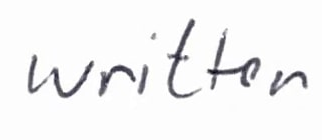

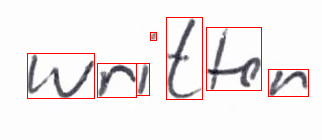

In [ ]:
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/OCR/smalls/3.png")
cv2_imshow(image)
cv2_imshow(characterDetect(image,threshold_value=210,thinning=False))

# DFS for segmentation

In [ ]:
def dfssegment(image,k):
  """
  Takes in binary image of (0 and 1 ) not (0 and 255) and performs segmentation based on DFS"""
  elements={k}
  i,j=k
  stack=[(i,j)]
  while len(stack)!=0:
    i,j=stack.pop()
    if image[i,j]==0:
      continue
    else:
      image[i,j]=0
    elements.add((i,j))
    for a in [i-1,i,i+1]:
      for b in [j-1,j,j+1]:
        if image[a,b]==1:
          stack.append((a,b))
  return elements

In [ ]:
def dfschardet(image,threshold_value=220):

  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  _,image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
  image = 255 - image
  main_image=image
  xpairs=[]
  ypairs=[]
  while(np.sum(main_image)!=0):
    hor_hist=np.sum(main_image,axis=1)
    m=np.argmax(hor_hist)
    for i in range(len(main_image[0,:])):
      if main_image[m,i]>0:
        break
    n=i

    die_image=main_image

    die_image=die_image/255
    clusters=dfssegment(die_image,(m,n))

    die_image=die_image*255
    det_image=main_image-die_image

    # for i,j in clusters:
    #   die_image[i,j]=255

    row_sums = np.sum(det_image, axis=1)
    column_sums=np.sum(det_image, axis=0)

    x=getleftrightimg(row_sums)

    top,bottom=x[0]


    y=getleftrightimg(column_sums)

    left,right=y[0]

    xpairs.append((left,right))
    ypairs.append((top,bottom))


    main_image=die_image

  return xpairs,ypairs



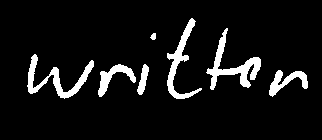

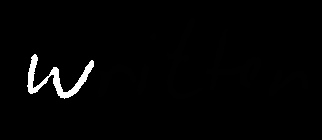

In [ ]:
#Here im just testing whether the function is working
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/OCR/smalls/3.png")
threshold_value=220
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_,image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
image = 255 - image
# dummy=inverted_image
cv2_imshow(image)
l=len(image[:,0])

for i in range(len(image[0,:])):
  if image[int(l/2),i]>0:
    break
image=image/255

clusters=dfssegment(image,(int(l/2),i))

for i,j in clusters:
  image[i,j]=255
cv2_imshow(image)

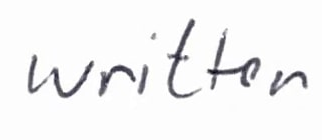

In [ ]:
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/OCR/smalls/3.png")
cv2_imshow(image)
xpairs,ypairs=dfschardet(image)
dummy_rgbimage=image

## Detecting points(.) on chars like 'i' 'j'

In [ ]:
image=cv2.imread("/content/drive/MyDrive/Colab Notebooks/OCR/smalls/3.png")
cv2_imshow(image)
xpairs,ypairs=dfschardet(image)
dummy_rgbimage=image

In [ ]:
#detecting points for chars like 'j','i'

dictx=dict(zip(xpairs,ypairs))

dictx=dict(sorted(dictx.items()))

xpairs=list(dictx.keys())
ypairs=list(dictx.values())

newx=xpairs
newy=ypairs
threshold_pixel=9
l=len(ypairs)
for i in range(l):
  if(i<len(ypairs)):
    y1,y2=ypairs[i]
    if(y2-y1)<threshold_pixel:
      py1,py2=ypairs[i-1]
      ypairs.insert(i+1,(y1,py2))
      del ypairs[i-1:i+1]

      px1,px2=xpairs[i-1]
      x1,x2=xpairs[i]
      xpairs.insert(i+1,(px1,x2))
      del xpairs[i-1:i+1]





## Remaining

In [ ]:
for i in range(len(xpairs)):
  x1,x2=xpairs[i]
  y1,y2=ypairs[i]
  cv2.rectangle(dummy_rgbimage,(x1,y1),(x2,y2),color=(0,0,255))

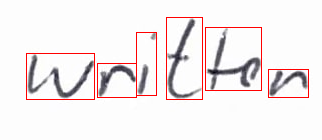

In [ ]:
  cv2_imshow(dummy_rgbimage)

In [ ]:
k=[1,3,2,1,7,4,1,2,5]

In [ ]:
k.insert(5,89)
del k[1:5]

In [ ]:
k

[1, 89, 4, 1, 2, 5]